In [1]:
import pandas as pd
review_data = pd.read_csv('reviews.csv')
review_data.shape

(211244, 6)

In [2]:
review_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


In [3]:
#Checking percentage of missing data in the dataset
count = review_data.isnull().sum().sort_values(ascending=True)
percentage = ((review_data.isnull().sum()/len(review_data)*100)).sort_values(ascending=True)
missing_data = pd.concat([count,percentage], axis=1, keys=['Count', 'Percentage'])
print(missing_data)

               Count  Percentage
listing_id         0    0.000000
id                 0    0.000000
date               0    0.000000
reviewer_id        0    0.000000
reviewer_name      0    0.000000
comments         107    0.050652


In [4]:
rows_to_be_dropped = review_data[review_data['comments'].isnull()]
rows_to_be_dropped

,listing_id,id,date,reviewer_id,reviewer_name,comments
24203,4294854,280053072,2018-06-22,190622944,Joey,NaN
24580,4378260,324592718,2018-09-17,214165763,Caitlin,NaN
26520,5056234,298292166,2018-07-29,175314263,Pilar,NaN
26548,5056234,571535302,2019-12-01,247512331,John,NaN
27001,5123315,332094758,2018-10-04,211846897,Patrick,NaN
...,...,...,...,...,...,...
209441,49895945,401954685779062724,2021-07-08,247235144,Furkan,NaN
209468,49895945,404112383085229159,2021-07-11,247235144,Furkan,NaN
210706,51448066,483142924875360923,2021-10-28,395251658,Sujina,NaN
210886,51650600,486818795104580689,2021-11-02,418727362,Paul,NaN


In [5]:
Test = rows_to_be_dropped.comments.isnull().groupby([rows_to_be_dropped['listing_id']]).sum().astype(int).reset_index(name='count')

In [6]:
Test.head()

,listing_id,count
0,4294854,1
1,4378260,1
2,5056234,2
3,5123315,1
4,5457387,1


In [7]:
review_data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."
...,...,...,...,...,...,...
211239,52898729,480195796886611920,2021-10-24,2701340,Hugh,Good family great hosts and very private and t...
211240,52898729,482445294591518938,2021-10-27,49721527,Francesco,"Great location, cozy place, really well equipp..."
211241,52898729,485335823464271820,2021-10-31,318997354,Alexandra Mia,We as a couple highly recommend the super nice...
211242,52959358,486808251184233843,2021-11-02,428996555,Matylda,Evelyn and Jimmy are really lovely; their plac...


In [8]:
review_data1 = review_data.dropna()

In [9]:
#Checking percentage of missing data in the dataset
count = review_data1.isnull().sum().sort_values(ascending=True)
percentage = ((review_data1.isnull().sum()/len(review_data)*100)).sort_values(ascending=True)
missing_data = pd.concat([count,percentage], axis=1, keys=['Count', 'Percentage'])
print(missing_data)

               Count  Percentage
listing_id         0         0.0
id                 0         0.0
date               0         0.0
reviewer_id        0         0.0
reviewer_name      0         0.0
comments           0         0.0


In [10]:
review_data1['comments']

0         We enjoyed our stay very much. The room was co...
1         We have been here 4 nights. Stay in a home is ...
2         Teresa and Hughie were great hosts. They were ...
3         No surprises, was as described.  Very gracious...
4         Teresa was a lovely hostess, and we had a deli...
                                ...                        
211239    Good family great hosts and very private and t...
211240    Great location, cozy place, really well equipp...
211241    We as a couple highly recommend the super nice...
211242    Evelyn and Jimmy are really lovely; their plac...
211243    We had a great time at Armando’s place! It was...
Name: comments, Length: 211137, dtype: object

In [11]:
import pandas as pd
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords
stopwords=list(stopwords.words('english'))
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text, output = 'as_string'): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    if output == 'as_list':
        lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    elif output == 'as_string':
        lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
        lemmas = ' '.join(lemmas)
    return lemmas 

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for words in tqdm(review_data1['comments']):
    reviews = words

    #replacing "\n" from the start of lines with blank
    reviews = re.sub(pattern='<br/>', repl='', string=reviews)
    #remove numbers
    reviews = re.sub(r'\d+', '', reviews)

    #removing anything between hard brackets, eg '[Interlude], '[Chorus]'
    reviews = re.sub(pattern="\[.+?\]( )?", repl='', string=reviews)

    #removing punctuation and joining blank if character is not in punctuation library
    punctuation = string.punctuation
    reviews = ''.join([x for x in reviews if x not in punctuation])

    reviews = reviews.replace('\\r', ' ')
    reviews = reviews.replace('\\"', ' ')
    #reviews = reviews.replace('br', ' ')
    #reviews = reviews.replace('br/', ' ')
    

    #remove special words in the song lyrics
    #lyrics = lyrics.replace('[Interlude]', '')
    #lyrics = lyrics.replace('[Refrain]', '')
    #lyrics = lyrics.replace('[Outro]', '')
    #lyrics = lyrics.replace('[Chorus]', '')
    #lyrics = lyrics.replace('Verse', '')
    #lyrics = lyrics.replace('\\n', ' ')
    #lyrics = lyrics.replace('b\d+\b', '')

    

    #sent = sent.replace('[', '')
    #sent = sent.replace(']', '')
    # https://gist.github.com/sebleier/554280
    reviews = ' '.join(e for e in reviews.split() if e.lower() not in stopwords)
    
    #making words lower case
    reviews = reviews.lower()
    preprocessed_reviews.append(reviews.strip())

review_data1['comments_clean'] = preprocessed_reviews

100%|██████████| 211137/211137 [00:32<00:00, 6581.60it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
review_data1[['comments', 'comments_clean']].head()

,comments,comments_clean
0,We enjoyed our stay very much. The room was co...,enjoyed stay much room comfortable neat clean ...
1,We have been here 4 nights. Stay in a home is ...,nights stay home best way improve english love...
2,Teresa and Hughie were great hosts. They were ...,teresa hughie great hosts welcoming us childre...
3,"No surprises, was as described. Very gracious...",surprises described gracious host nice place s...
4,"Teresa was a lovely hostess, and we had a deli...",teresa lovely hostess delightful stay cottage ...


In [17]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
review_data1['reviews_lem'] = review_data1['comments_clean'].apply(lemmatize_word)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
review_data1[['comments', 'comments_clean','reviews_lem']].head()

,comments,comments_clean,reviews_lem
0,We enjoyed our stay very much. The room was co...,enjoyed stay much room comfortable neat clean ...,enjoy stay much room comfortable neat clean pr...
1,We have been here 4 nights. Stay in a home is ...,nights stay home best way improve english love...,nights stay home best way improve english love...
2,Teresa and Hughie were great hosts. They were ...,teresa hughie great hosts welcoming us childre...,teresa hughie great host welcome us children r...
3,"No surprises, was as described. Very gracious...",surprises described gracious host nice place s...,surprise describe gracious host nice place sta...
4,"Teresa was a lovely hostess, and we had a deli...",teresa lovely hostess delightful stay cottage ...,teresa lovely host delightful stay cottage des...


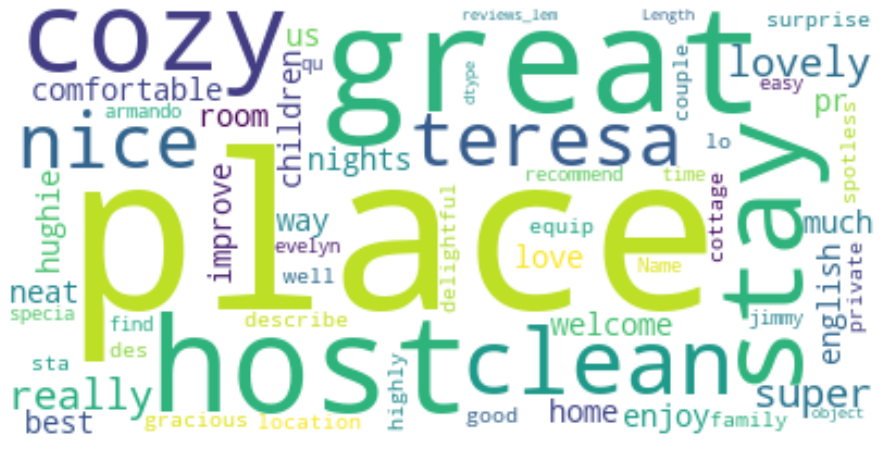

In [20]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(str(review_data1.reviews_lem))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Sentiment Analysis

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
polarity_score_dict = {
    "neg" : 0.0,
    "neu" : 0.0,
    "pos" : 0.0,
    "compound": 0.0
}
positive_song_ctr = 0
negative_song_ctr = 0
for song in review_data1['reviews_lem']:
    #accumulate the total sum for all sentiment categories
    polarity = SIA.polarity_scores(song)
    polarity_score_dict["neg"] += polarity["neg"]
    polarity_score_dict["neu"] += polarity["neu"]
    polarity_score_dict["pos"] += polarity["pos"]
    polarity_score_dict["compound"] += polarity["compound"]

    # count how many songs are positive and negative in the corpus
    if polarity["compound"] >= 0:
        positive_song_ctr += 1
    else:
        negative_song_ctr += 1

In [24]:
print("There are", positive_song_ctr, "positive reviews from the corpus")
print("There are", negative_song_ctr, "negative reviews from the corpus")

There are 200878 positive reviews from the corpus
There are 10259 negative reviews from the corpus


In [25]:
print(polarity_score_dict)

{'neg': 4924.682999999965, 'neu': 115002.51799999463, 'pos': 90711.90100000199, 'compound': 151630.1247000036}


#Emotion Detection

In [26]:
!pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 29.0 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=7eeb0c36d498b75a4ef1fea5d0177319944876348cbb8c6ec0994f1b0e41d227
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [27]:
from nrclex import NRCLex

In [28]:
review_data1['review_Emotion'] = review_data1['reviews_lem'].apply(lambda x: NRCLex(x).affect_frequencies)
review_data1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_clean,reviews_lem,review_Emotion
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...,enjoyed stay much room comfortable neat clean ...,enjoy stay much room comfortable neat clean pr...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...,nights stay home best way improve english love...,nights stay home best way improve english love...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...,teresa hughie great hosts welcoming us childre...,teresa hughie great host welcome us children r...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious...",surprises described gracious host nice place s...,surprise describe gracious host nice place sta...,"{'fear': 0.0625, 'anger': 0.0625, 'anticip': 0..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli...",teresa lovely hostess delightful stay cottage ...,teresa lovely host delightful stay cottage des...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [29]:
review_data1 = pd.concat([review_data1.drop(['review_Emotion'], axis = 1), review_data1['review_Emotion'].apply(pd.Series)], axis = 1)
review_data1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_clean,reviews_lem,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...,enjoyed stay much room comfortable neat clean ...,enjoy stay much room comfortable neat clean pr...,0.0000,0.0000,0.0,0.263158,0.052632,0.315789,0.052632,0.052632,0.0,0.157895,0.105263
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...,nights stay home best way improve english love...,nights stay home best way improve english love...,0.0000,0.0000,0.0,0.190476,0.095238,0.190476,0.000000,0.095238,0.0,0.190476,0.238095
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...,teresa hughie great hosts welcoming us childre...,teresa hughie great host welcome us children r...,0.0000,0.0000,0.0,0.142857,0.142857,0.357143,0.000000,0.000000,0.0,0.214286,0.142857
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious...",surprises described gracious host nice place s...,surprise describe gracious host nice place sta...,0.0625,0.0625,0.0,0.125000,0.125000,0.250000,0.062500,0.000000,0.0,0.125000,0.187500
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli...",teresa lovely hostess delightful stay cottage ...,teresa lovely host delightful stay cottage des...,0.0000,0.0000,0.0,0.222222,0.055556,0.277778,0.000000,0.055556,0.0,0.222222,0.166667


In [30]:
# Finding the max value from the emotion columns and appending it to new 'Overall_Emotion' column
review_data1['Overall_Emotion'] = review_data1[['fear', 'anger', 'anticipation', 'trust', 'surprise', 'sadness', 'disgust', 'joy']].idxmax(axis=1)

In [31]:
review_data1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_clean,reviews_lem,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Overall_Emotion
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...,enjoyed stay much room comfortable neat clean ...,enjoy stay much room comfortable neat clean pr...,0.0000,0.0000,0.0,0.263158,0.052632,0.315789,0.052632,0.052632,0.0,0.157895,0.105263,trust
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...,nights stay home best way improve english love...,nights stay home best way improve english love...,0.0000,0.0000,0.0,0.190476,0.095238,0.190476,0.000000,0.095238,0.0,0.190476,0.238095,anticipation
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...,teresa hughie great hosts welcoming us childre...,teresa hughie great host welcome us children r...,0.0000,0.0000,0.0,0.142857,0.142857,0.357143,0.000000,0.000000,0.0,0.214286,0.142857,joy
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious...",surprises described gracious host nice place s...,surprise describe gracious host nice place sta...,0.0625,0.0625,0.0,0.125000,0.125000,0.250000,0.062500,0.000000,0.0,0.125000,0.187500,anticipation
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli...",teresa lovely hostess delightful stay cottage ...,teresa lovely host delightful stay cottage des...,0.0000,0.0000,0.0,0.222222,0.055556,0.277778,0.000000,0.055556,0.0,0.222222,0.166667,trust


In [32]:
def review_emotion(text):
    #word = [word for word in word if word not in stopwords.words('english')]
    reviews = str([cell.encode('utf-8') for cell in text])# to convert the text into utf-8 unicode
    str_text = NRCLex(reviews) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

In [33]:
overall_emotion = review_emotion(review_data1.reviews_lem)

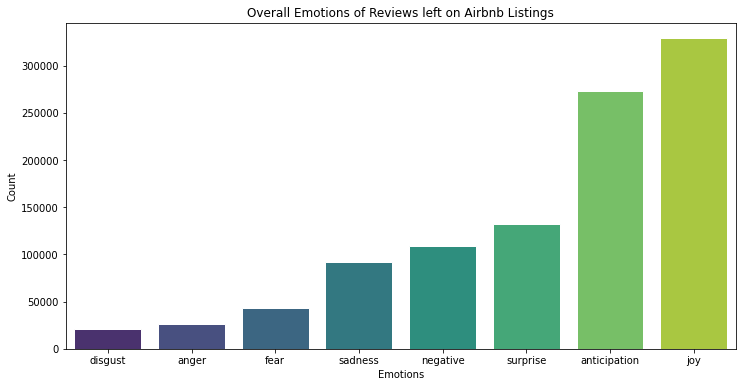

In [34]:
plt.figure(figsize=(12,6))
plt.title('Overall Emotions of Reviews left on Airbnb Listings')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(x='Emotions',y='Count',data = overall_emotion[0:8],palette='viridis');

In [35]:
review_data1

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_clean,reviews_lem,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Overall_Emotion
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...,enjoyed stay much room comfortable neat clean ...,enjoy stay much room comfortable neat clean pr...,0.0000,0.0000,0.0,0.263158,0.052632,0.315789,0.052632,0.052632,0.0,0.157895,0.105263,trust
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...,nights stay home best way improve english love...,nights stay home best way improve english love...,0.0000,0.0000,0.0,0.190476,0.095238,0.190476,0.000000,0.095238,0.0,0.190476,0.238095,anticipation
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...,teresa hughie great hosts welcoming us childre...,teresa hughie great host welcome us children r...,0.0000,0.0000,0.0,0.142857,0.142857,0.357143,0.000000,0.000000,0.0,0.214286,0.142857,joy
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious...",surprises described gracious host nice place s...,surprise describe gracious host nice place sta...,0.0625,0.0625,0.0,0.125000,0.125000,0.250000,0.062500,0.000000,0.0,0.125000,0.187500,anticipation
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli...",teresa lovely hostess delightful stay cottage ...,teresa lovely host delightful stay cottage des...,0.0000,0.0000,0.0,0.222222,0.055556,0.277778,0.000000,0.055556,0.0,0.222222,0.166667,trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211239,52898729,480195796886611920,2021-10-24,2701340,Hugh,Good family great hosts and very private and t...,good family great hosts private place spotless...,good family great host private place spotless ...,0.1000,0.0000,0.0,0.200000,0.100000,0.200000,0.100000,0.100000,0.0,0.100000,0.100000,trust
211240,52898729,482445294591518938,2021-10-27,49721527,Francesco,"Great location, cozy place, really well equipp...",great location cozy place really well equipped...,great location cozy place really well equip lo...,0.0000,0.0000,0.0,0.166667,0.166667,0.166667,0.000000,0.166667,0.0,0.166667,0.166667,anticipation
211241,52898729,485335823464271820,2021-10-31,318997354,Alexandra Mia,We as a couple highly recommend the super nice...,couple highly recommend super nice cozy specia...,couple highly recommend super nice cozy specia...,0.0000,0.0000,0.0,0.200000,0.100000,0.300000,0.000000,0.100000,0.0,0.200000,0.100000,trust
211242,52959358,486808251184233843,2021-11-02,428996555,Matylda,Evelyn and Jimmy are really lovely; their plac...,evelyn jimmy really lovely place super cozy qu...,evelyn jimmy really lovely place super cozy qu...,0.0000,0.0000,0.0,0.208333,0.083333,0.250000,0.000000,0.125000,0.0,0.166667,0.166667,trust


In [36]:
review_data1 = review_data1.fillna(0)
grouped = review_data1.groupby(['listing_id'])["fear", "anger", "anticipation", "trust", "surprise", "positive", "negative", "sadness", "disgust", "joy"].apply(lambda x : x.astype(int).sum())



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [37]:
overall_em = review_data1.groupby(["listing_id"]).agg(pd.Series.mode)


In [38]:
overall_em = overall_em['Overall_Emotion']


In [39]:
grouped

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
listing_id,,,,,,,,,,
44077,0,0,2,1,1,5,2,1,0,0
85148,0,0,0,0,0,0,0,0,0,0
85156,0,0,1,0,0,3,0,0,1,0
159889,0,0,0,0,0,5,0,1,0,0
162809,0,0,1,0,0,15,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
52850962,0,0,0,0,0,0,0,0,0,0
52879135,0,0,0,0,0,0,0,0,0,0
52898729,0,0,0,0,0,0,0,0,0,0


In [40]:
df_cd = pd.merge(grouped, overall_em, how='inner', on='listing_id')
df_cd

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,Overall_Emotion
listing_id,,,,,,,,,,,
44077,0,0,2,1,1,5,2,1,0,0,trust
85148,0,0,0,0,0,0,0,0,0,0,anticipation
85156,0,0,1,0,0,3,0,0,1,0,trust
159889,0,0,0,0,0,5,0,1,0,0,trust
162809,0,0,1,0,0,15,2,0,0,0,trust
...,...,...,...,...,...,...,...,...,...,...,...
52850962,0,0,0,0,0,0,0,0,0,0,trust
52879135,0,0,0,0,0,0,0,0,0,0,fear
52898729,0,0,0,0,0,0,0,0,0,0,trust


In [41]:
#Join with listings data and predict overall review score as dependant variable.
url = "https://raw.githubusercontent.com/Jordan-tcw/FinalYearProject/main/DetailedListingInfo.csv"
listings = pd.read_csv(url)
#Shape should return 6976,74 if i,ported correctly
listings.shape

(6976, 74)

In [42]:
#Rename id to listing id to match with df_cd when joining
listings = listings.rename(columns={"id": "listing_id"})
#Set listing_id as the index
listings_df = listings.set_index('listing_id')
listings_df.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
44077,https://www.airbnb.com/rooms/44077,20211107161700,2021-11-08,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,...,4.92,4.66,4.82,NaN,f,3,0,3,0,1.82
85148,https://www.airbnb.com/rooms/85148,20211107161700,2021-11-08,Habitación en Dublín Double room,<b>The space</b><br />I'm renting a double roo...,NaN,https://a0.muscache.com/pictures/583752/61c664...,466111,https://www.airbnb.com/users/show/466111,Don,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.03
85156,https://www.airbnb.com/rooms/85156,20211107161700,2021-11-08,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,...,4.88,4.66,4.80,NaN,f,3,0,3,0,2.15
159889,https://www.airbnb.com/rooms/159889,20211107161700,2021-11-08,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,...,4.90,4.62,4.74,NaN,t,3,0,3,0,3.44
162809,https://www.airbnb.com/rooms/162809,20211107161700,2021-11-08,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,https://www.airbnb.com/users/show/777681,Robert,...,4.97,4.77,4.84,NaN,f,2,0,2,0,3.75


In [43]:
#Isolate 'review_score_rating'
review_scores = listings_df['review_scores_rating']

In [44]:
#Must join dataframes then drop null rows. using inner join as to only keep rows that match in both datafames.
modelling_data = pd.merge(df_cd, review_scores, left_index=True, right_index=True)

In [45]:
modelling_data.head()

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,Overall_Emotion,review_scores_rating
listing_id,,,,,,,,,,,,
44077,0,0,2,1,1,5,2,1,0,0,trust,4.77
85148,0,0,0,0,0,0,0,0,0,0,anticipation,0.00
85156,0,0,1,0,0,3,0,0,1,0,trust,4.79
159889,0,0,0,0,0,5,0,1,0,0,trust,4.75
162809,0,0,1,0,0,15,2,0,0,0,trust,4.83


In [46]:
#Check for null data 
modelling_data.isna().sum()

fear                    0
anger                   0
anticipation            0
trust                   0
surprise                0
positive                0
negative                0
sadness                 0
disgust                 0
joy                     0
Overall_Emotion         0
review_scores_rating    0
dtype: int64

In [47]:
#check the data types
print(modelling_data.dtypes)
#convert 'Overall_Emotion' to string

fear                      int64
anger                     int64
anticipation              int64
trust                     int64
surprise                  int64
positive                  int64
negative                  int64
sadness                   int64
disgust                   int64
joy                       int64
Overall_Emotion          object
review_scores_rating    float64
dtype: object


In [48]:
#Need to split 'Overall_emotions' column array into seperate columns
mode_emotions = modelling_data.Overall_Emotion.apply(pd.Series)
mode_emotions.columns = ['emotion1','emotion2', 'emotion3', 'emotion4','emotion5']
mode_emotions.head()

,emotion1,emotion2,emotion3,emotion4,emotion5
listing_id,,,,,
44077,trust,NaN,NaN,NaN,NaN
85148,anticipation,NaN,NaN,NaN,NaN
85156,trust,NaN,NaN,NaN,NaN
159889,trust,NaN,NaN,NaN,NaN
162809,trust,NaN,NaN,NaN,NaN


In [49]:
#check 8 emotions are detected
mode_emotions['emotion1'].unique()

array(['trust', 'anticipation', 'fear', 'joy', 'anger', 'sadness',
       'surprise', 'disgust'], dtype=object)

In [50]:
#need to join new dataframe ('mode_emotions') with 'modelling_data'
#modelling_df = pd.merge(modelling_data, mode_emotions, left_index=True, right_index=True)
#Only keep the most prodominent emotion column ('emotion1') and remove 'Overall_Emotion' and other emotion2.... columns.
#modelling_df.drop(['Overall_Emotion','emotion2','emotion3','emotion4','emotion5'],axis=1,inplace=True)
modelling_data.drop(['Overall_Emotion'],axis=1,inplace=True)
modelling_data.head()

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,review_scores_rating
listing_id,,,,,,,,,,,
44077,0,0,2,1,1,5,2,1,0,0,4.77
85148,0,0,0,0,0,0,0,0,0,0,0.00
85156,0,0,1,0,0,3,0,0,1,0,4.79
159889,0,0,0,0,0,5,0,1,0,0,4.75
162809,0,0,1,0,0,15,2,0,0,0,4.83


In [51]:
#must one hot encode 'emotion1' in order run the algorithms.
#We have 3 object columns in order for our models to run we must one hot encode them.
df_dummies = pd.get_dummies(modelling_data)
df_dummies

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,review_scores_rating
listing_id,,,,,,,,,,,
44077,0,0,2,1,1,5,2,1,0,0,4.77
85148,0,0,0,0,0,0,0,0,0,0,0.00
85156,0,0,1,0,0,3,0,0,1,0,4.79
159889,0,0,0,0,0,5,0,1,0,0,4.75
162809,0,0,1,0,0,15,2,0,0,0,4.83
...,...,...,...,...,...,...,...,...,...,...,...
52850962,0,0,0,0,0,0,0,0,0,0,4.25
52879135,0,0,0,0,0,0,0,0,0,0,5.00
52898729,0,0,0,0,0,0,0,0,0,0,5.00


#Regression Modelling
Using regression modelling we will try predict the 'review_scores_rating' using the emotions columns.

In [52]:
#libraries
#import neccessary packages 
import pandas as pd #importing data
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt #Import matplotlib for plotting graphs
%matplotlib inline

#Linear regression packages
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model #import linear_model regression
from sklearn.metrics import r2_score,mean_squared_error #import r2_score and MSE

#extra packages needed for Ridge & Lasso regression 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#Extra packages for Elastic Net 
from numpy import mean
from numpy import std
from numpy import arange
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#Extra Packages for PCR 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
'''Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, 
but the type of scaling used could be experimented with later to see if alternative versions yield better results.'''
# Separating X and y
X = df_dummies.drop('review_scores_rating', axis=1)
y = df_dummies.review_scores_rating

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))


In [54]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape); print(X_test.shape)

(4436, 10)
(1110, 10)


###Baseline models
**NOTE:** Due to the presence of extreme outliers and skewness in the data set I chose to evaluate the model's accuracy on a mean squared error basis rather than a median absolute error basis, as I had transformed the numerical columns into the log of the columns. In turn dealing with the skewness within the dataset. 



In [55]:
from logging import root
from math import sqrt
from sklearn.metrics import mean_absolute_error
#Linear regression
#OLS
# Cross validate on 5 folds
cv = KFold(n_splits = 5)
linreg = LinearRegression()

# Store r2 and mean squared error of testing data for graphing purposes later
MSE =[]
R2 = []

for train, test in cv.split(X):
    # Fit linreg
    linreg.fit(X_train, y_train)
    
    #predict training
    y_predict_train = linreg.predict(X_train)
    # Predict and score testing
    y_predict_test = linreg.predict(X_test)
    R2.append(linreg.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, y_predict_test))

# Output and store scores after CV
lin_testing_set_score = np.mean(R2)
lin_mean_squared_error = np.mean(MSE)
print("Linear Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRoot MSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)),3)))
print('\tR-Squared on testing data: ' + str(round(lin_testing_set_score, 3)))
print('\tRoot Mean Squared Error on testing data: ' + str(round(sqrt(lin_mean_squared_error),3)))

Linear Regression
	R-squared training data:  0.008
	Root MSE training data: 0.828
	R-Squared on testing data: 0.009
	Root Mean Squared Error on testing data: 0.914


In [56]:
#Ridge Regression
# Tuning paramater values for Ridge
lambdas = 10.**np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Perform Ridge regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
ridge = RidgeCV(alphas = lambdas, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE =[]
R2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X):
    # Fit linreg
    ridge.fit(X_train, y_train)
    
    #predict training
    y_predict_train = ridge.predict(X_train)
    # Predict and score
    Y_predict = ridge.predict(X_test)
    R2.append(ridge.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, Y_predict))
    
# Output and store scores after CV
ridge_testing_set_score = np.mean(R2)
ridge_mean_squared_error = np.mean(MSE)
print("Ridge Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRoot MSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(ridge_testing_set_score,3)))
print('\tRoot Mean Squared Error testing data: ' + str(round(sqrt(ridge_mean_squared_error),3)))


Ridge Regression
	R-squared training data:  0.008
	Root MSE training data: 0.828
	R-squared testing data: 0.009
	Root Mean Squared Error testing data: 0.914


In [57]:
# Perform Lasso regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
lasso = LassoCV(alphas = lambdas, tol = 0.5, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE =[]
R2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X):
    # Fit linreg
    lasso.fit(X_train, y_train)
    
    #predict training
    y_predict_train = lasso.predict(X_train)
    # Predict and score
    Y_predict = lasso.predict(X_test)
    R2.append(lasso.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, Y_predict))

# Output and store scores after CV
lasso_testing_set_score = np.mean(R2)
lasso_mean_squared_error = np.mean(MSE)
print("Lasso Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(lasso_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(lasso_mean_squared_error),3)))

Lasso Regression
	R-squared training data:  0.008
	RMSE training data: 0.828
	R-squared testing data: 0.009
	The root mean squared error testing data: 0.914


###Ensemble models

In [58]:
from sklearn.ensemble import RandomForestRegressor
# Fit random forest
rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train, y_train)

#predict training
y_predict_train = rf.predict(X_train)
# Predict and score RF
y_predict = rf.predict(X_test)
rf_testing_set_score = rf.score(X_test, y_test)
rf_mean_squared_error = mean_squared_error(y_test, y_predict)
print("Random Forest Regressor")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(rf_testing_set_score,3)))
print('\tThe root mean squared error testing data:  ' + str(round(sqrt(rf_mean_squared_error),3)))

Random Forest Regressor
	R-squared training data:  0.03
	RMSE training data: 0.819
	R-squared testing data: 0.023
	The root mean squared error testing data:  0.907


In [59]:
#Tuned random forest regressor
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 30, 50],
    "n_jobs": [-1],
   # "oob_score": [True],
    "max_features": [None, 'log2', 'auto']
}

# Run 3-fold CV grid search to tune hyperparameters
rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = tuned_parameters)

# Score model
preds = rf_tuned.fit(X_train, y_train)
best = rf_tuned.best_estimator_ 
y_predict_train = rf_tuned.predict(X_train)
y_predict = rf_tuned.predict(X_test)
rft_testing_set_score = rf_tuned.score(X_test, y_test)
rft_mean_squared_error = mean_squared_error(y_test, y_predict)

# Output score and model info
print('Tuned Random Forest Regressor')
print('\tThe best paramaters are:', rf_tuned.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(rft_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(rft_mean_squared_error),3)))

Tuned Random Forest Regressor
	The best paramaters are: {'max_features': 'log2', 'n_estimators': 50, 'n_jobs': -1}
	R-squared training data:  0.03
	RMSE training data: 0.819
	R-squared testing data: 0.024
	The root mean squared error testing data: 0.907


In [60]:
#AdaBoost Regressor ()
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

y_predict_train = ada.predict(X_train)

# Predict and score adaboost
y_predict = ada.predict(X_test)
ada_testing_set_score = ada.score(X_test, y_test)
ada_mean_squared_error = mean_squared_error(y_test, y_predict)

#output score of model
print('AdaBoost Regressor')
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_mean_squared_error),3)))

AdaBoost Regressor
	R-squared training data:  0.022
	RMSE training data: 0.822
	The R-squared testing data: 0.023
	The root mean squared error testing data: 0.908


In [61]:
#AdaBoost Regressor (with Random Forest as Base Estimator)
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada_rf = AdaBoostRegressor(base_estimator = rf)
ada_rf.fit(X_train, y_train)

y_predict_train = ada_rf.predict(X_train)

# Predict and score adaboost
y_predict = ada_rf.predict(X_test)
ada_rf_testing_set_score = ada_rf.score(X_test, y_test)
ada_rf_mean_squared_error = mean_squared_error(y_test, y_predict)

#output score of model
print('AdaBoost Regressor with RF')
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_rf_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_rf_mean_squared_error),3)))

AdaBoost Regressor with RF
	R-squared training data:  0.026
	RMSE training data: 0.821
	The R-squared testing data: 0.02
	The root mean squared error testing data: 0.909


In [62]:
#Tuned AdaBoost Regressor (with Decision Tree as Base Estimator)
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 25, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "loss" : ['linear', 'square']
}

clf = GridSearchCV(AdaBoostRegressor(), cv=3, param_grid=tuned_parameters)
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_ 
y_predict_train = clf.predict(X_train)
Y_predict = clf.predict(X_test)
clf_testing_set_score = clf.score(X_test, y_test)
clf_mean_sqrd_error = mean_squared_error(y_test, Y_predict)

# Output score and model info
print('Tuned AdaBoost Regressor')
print('\tThe best paramaters are:', clf.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(clf_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(clf_mean_sqrd_error),3)))

Tuned AdaBoost Regressor
	The best paramaters are: {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 100}
	R-squared training data:  0.021
	RMSE training data: 0.823
	R-squared testing data: 0.02
	The root mean squared error testing data: 0.909


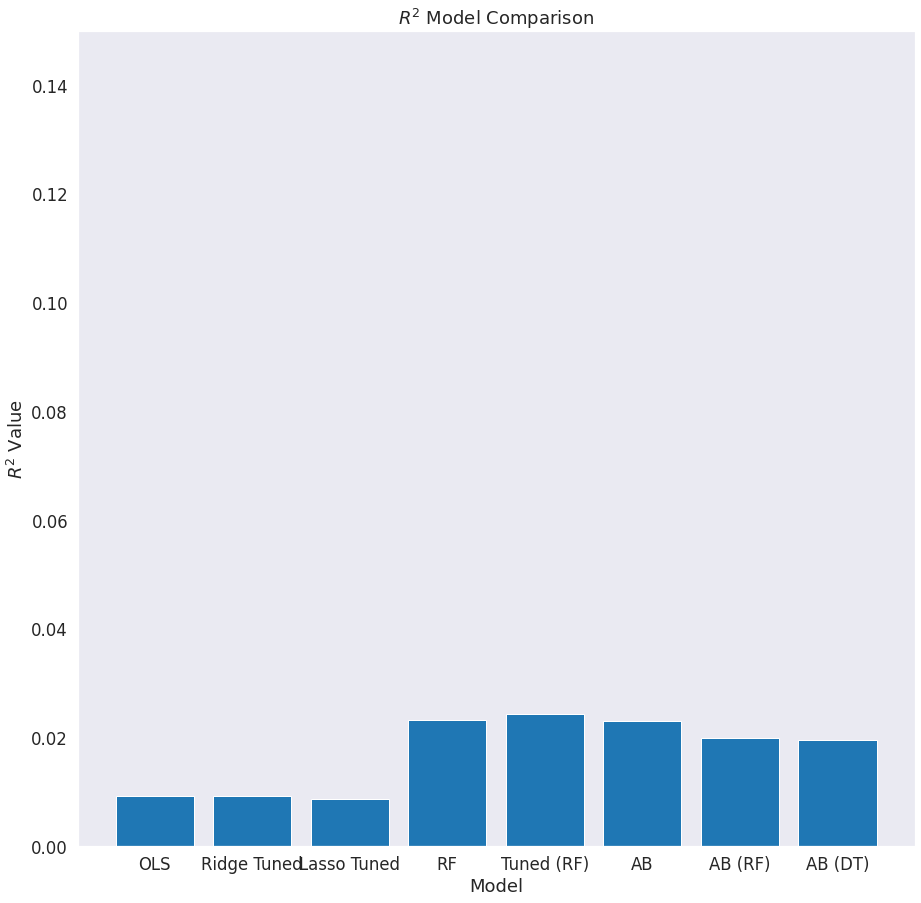

In [63]:
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_testing_set_score, ridge_testing_set_score, lasso_testing_set_score, 
                      rf_testing_set_score, rft_testing_set_score, ada_testing_set_score, ada_rf_testing_set_score, 
                      clf_testing_set_score])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots R^2 bars across functions
plt.figure(figsize=(15,15))
plt.bar(pos, error_val, align = 'center')
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('$R^2$ Value')
plt.title('$R^2$ Model Comparison')
plt.ylim(0.0,0.15)
plt.show()

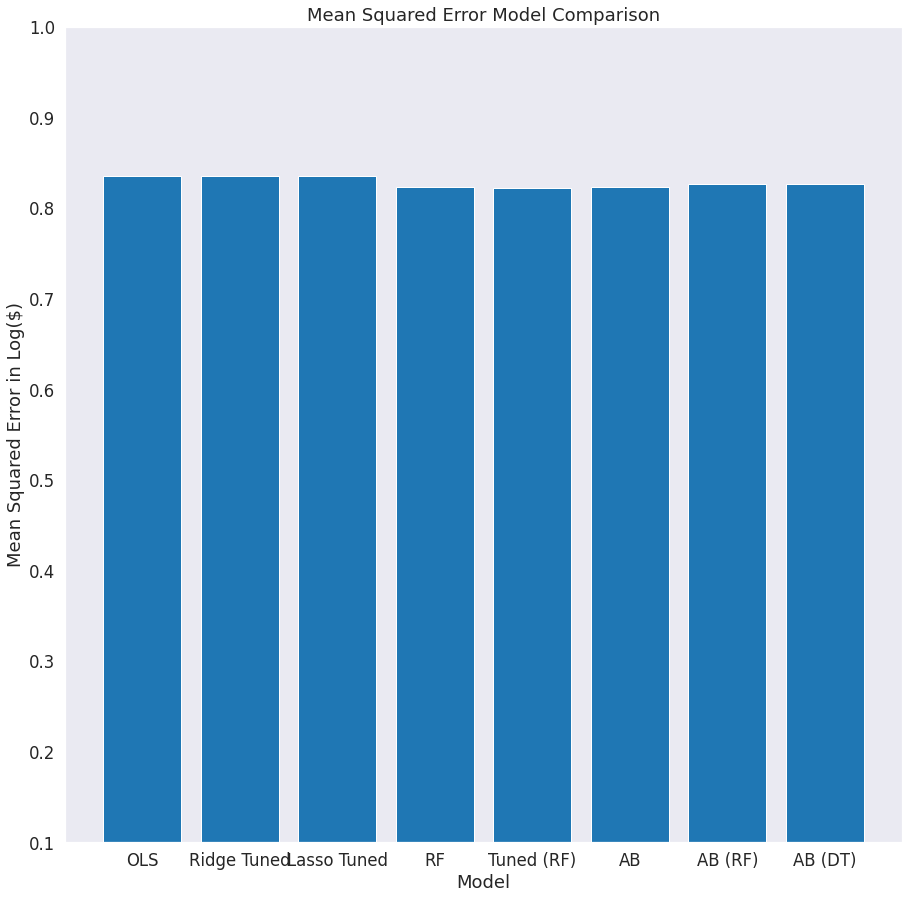

In [64]:
#MSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_mean_squared_error, ridge_mean_squared_error, lasso_mean_squared_error, 
                      rf_mean_squared_error, rft_mean_squared_error, ada_mean_squared_error, ada_rf_mean_squared_error,
                      clf_mean_sqrd_error])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots Mean Absolute Variance bars across functions
plt.figure(figsize=(15,15))
#plt.bar(pos, error_val[srt], align = 'center', color=BNB_BLUE)
#plt.xticks(pos, labels[srt])
plt.bar(pos, error_val, align = 'center')
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error in Log($)')
plt.title('Mean Squared Error Model Comparison')
plt.ylim(0.1,1)
plt.show()

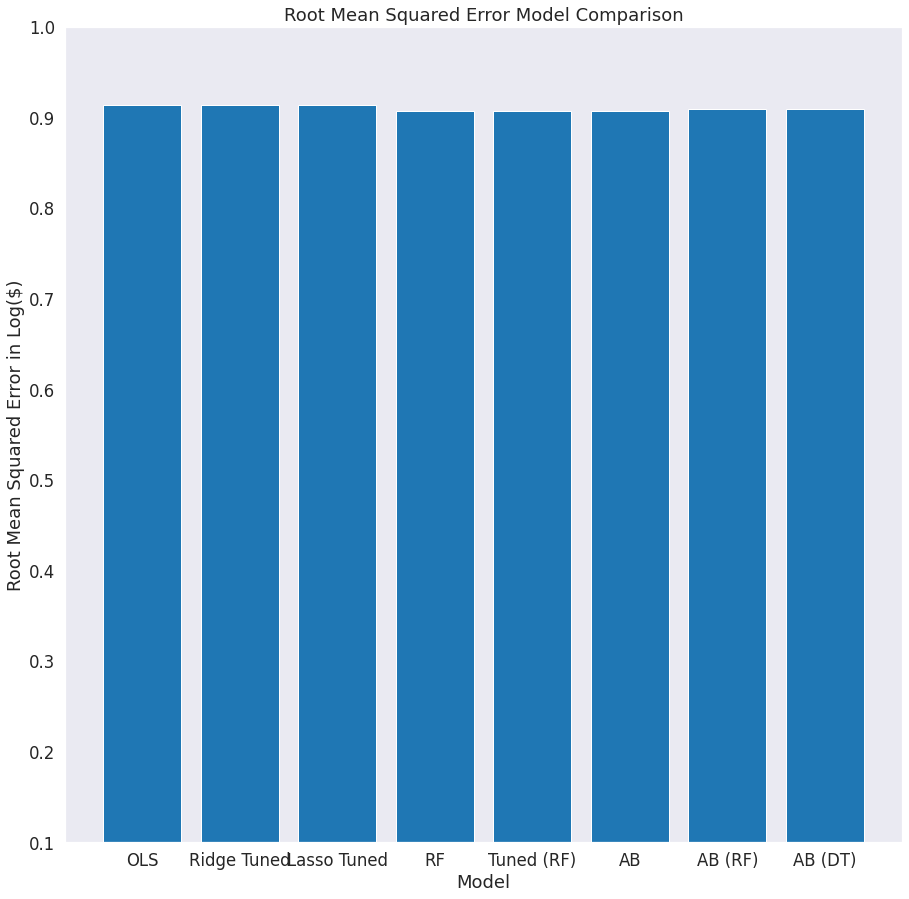

In [65]:
#RMSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB', 'AB (RF)', 'AB (DT)'])
error_val = np.array([sqrt(lin_mean_squared_error), sqrt(ridge_mean_squared_error), sqrt(lasso_mean_squared_error), 
                      sqrt(rf_mean_squared_error), sqrt(rft_mean_squared_error), sqrt(ada_mean_squared_error), sqrt(ada_rf_mean_squared_error),
                      sqrt(clf_mean_sqrd_error)])

# Arrange bars
pos = np.arange(error_val.shape[0])

# Plots Mean squared Variance bars across functions
plt.figure(figsize=(15,15))
plt.bar(pos, error_val, align = 'center')
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error in Log($)')
plt.title('Root Mean Squared Error Model Comparison')
plt.ylim(0.1,1)
plt.show()
#Adaboost with Random forest as base estimator is best model at this stage.

###Neural Network
In this section several machine learning and deep learning models will be built in order to predict an Airbnb listing's price.

<br> I will still use RMSE (for loss) and r squared (for accuracy) as the evaluation metrics.



In [66]:
'''Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a 
measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy
increases from hyper-parameter tuning) due to XGBoost's superior performance'''
#XGboost model
import xgboost as xgb 
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor(silent=True)
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print('Vanilla XGBoost')
print(f"\tTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\tR-Squared on Training data: ", round(r2_score(y_train, training_preds_xgb_reg),4))
print("\tRoot Mean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train, training_preds_xgb_reg)),4))
print("\tR-Squared on testing data: ", round(r2_score(y_test, val_preds_xgb_reg),4))
print("\tRoot Mean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),4))


Vanilla XGBoost
	Time taken to run: 0.0 minutes
	R-Squared on Training data:  0.0248
	Root Mean Squared Error on training data:  0.8211
	R-Squared on testing data:  0.024
	Root Mean Squared Error on testing data:  0.9071


Roughly a quarter of the features have very little importance (score of 0). and could potentially be removed (although they will not be for the deep learning modeling part of this project, as they may have interactions with other features).<br>
Top 5 features of importance:

*   Room type entire home/apt
*   Accomodates
*   Bedrooms
*   Host listings count
*   Property type shared room house

<br>it is not surprising that the most important feature is how many people the property accommodates, as that's one of the main things you would use to search for properties with in the first place.

<br>it is also unsurprising that features related to listing type i.e. room type and property type are important as these are usually specified by users when searching for accomodation. With the more private types being expensive usually.

<br>It is perhaps more surprising that the fourth most important feature is related to how many other listings the host manages on Airbnb, rather than the listing itself. However, this does not mean that a host that manages more properties will result in a listing gaining higher prices. Firstly, the data appears to be somewhat skewed by a few very large property managers. Secondly, the relationship is with the advertised prices set, rather than actual prices achieved, suggesting that if anything more experienced hosts tend to set (rather than necessarily achieve) higher prices. And thirdly, we cannot necessarily imply a causative relationship - it could be that more experienced multi-listing hosts (especially Airbnb property management companies) tend to take on more expensive properties (which is indeed the case for some, e.g. One Fine Stay)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 100,481
Trainable params: 100,481
Non-trainable params: 0
_________________________________________________________________
None


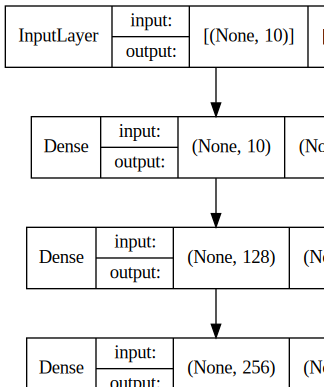

In [67]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
#Three layer neural network
'''For the initial version of the neural network, a relatively shallow three layer NN will be created. It will consist of densely-connected layers,
and use a relu activation function for the hidden layers and a linear activation function for the output layer, as it is being used for a regression task.
The loss function will be mean squared error (again, because this is for regression).'''
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [68]:
# Training the model
nn2_start = time.time()

nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/100
16/16 [==============================] - 1s 21ms/step - loss: 12.1551 - mean_squared_error: 12.1551 - val_loss: 3.5691 - val_mean_squared_error: 3.5691
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 2.3350 - mean_squared_error: 2.3350 - val_loss: 1.9826 - val_mean_squared_error: 1.9826
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 1.4418 - mean_squared_error: 1.4418 - val_loss: 1.5555 - val_mean_squared_error: 1.5555
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 1.1704 - mean_squared_error: 1.1704 - val_loss: 1.2757 - val_mean_squared_error: 1.2757
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 1.0288 - mean_squared_error: 1.0288 - val_loss: 1.2173 - val_mean_squared_error: 1.2173
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.9407 - mean_squared_error: 0.9407 - val_loss: 1.0862 - val_mean_squared_error: 1.0862
Epoch 7/100
16/16 [===========

In [69]:
#RMSE and r squared values
y_test_pred = nn2.predict(X_test)
y_train_pred = nn2.predict(X_train)
print('Three-layer Neural Network')
print("\tR-Squared on Training data: ", round(r2_score(y_train, y_train_pred),4))
print("\tMean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train, y_train_pred)),4))
print("\tR-Squared on testing data: ", round(r2_score(y_test, y_test_pred),4))
print("\tMean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test, y_test_pred)),4))
#The neural network performs the worst of all model and therefore will not be taken further is most likely due to the fact for neural networks to work they need to be passed masses of data from datawarehouses.

Three-layer Neural Network
	R-Squared on Training data:  0.018
	Mean Squared Error on training data:  0.824
	R-Squared on testing data:  -0.0013
	Mean Squared Error on testing data:  0.9188


###Tuning XGBoost

In [70]:
#As a result I will take the best performing model (Vanilla XGBoost) and try to immprove its accuracies.
#XGboost model using grid search 
#in order to tune the XGBoost, I first need to build DMatrices for the model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# Parameters to run grid search on
params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "rmse"
num_boost_round = 2000

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=12
)

print("Best RMSE: {:.3f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[13:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:2.96367
Will train until Test-rmse hasn't improved in 12 rounds.
[1]	Test-rmse:2.16431
[2]	Test-rmse:1.63918
[3]	Test-rmse:1.31018
[4]	Test-rmse:1.11675
[5]	Test-rmse:1.01049
[6]	Test-rmse:0.95548
[7]	Test-rmse:0.928444
[8]	Test-rmse:0.915664
[9]	Test-rmse:0.909879
[10]	Test-rmse:0.907465
[11]	Test-rmse:0.906526
[12]	Test-rmse:0.906321
[13]	Test-rmse:0.906288
[14]	Test-rmse:0.906403
[15]	Test-rmse:0.906511
[16]	Test-rmse:0.906602
[17]	Test-rmse:0.906674
[18]	Test-rmse:0.906766
[19]	Test-rmse:0.906829
[20]	Test-rmse:0.90686
[21]	Test-rmse:0.906882
[22]	Test-rmse:0.906914
[23]	Test-rmse:0.906936
[24]	Test-rmse:0.906958
[25]	Test-rmse:0.906946
Stopping. Best iteration:
[13]	Test-rmse:0.906288

Best RMSE: 0.906 with 14 rounds


In [71]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

[13:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.971659,0.001426,2.971677,0.015972
1,2.162384,0.002644,2.162498,0.011688
2,1.624272,0.005612,1.624492,0.009258
3,1.280119,0.008488,1.280400,0.015192
4,1.071559,0.010950,1.072121,0.024898
5,0.952532,0.012753,0.953065,0.034674
6,0.888123,0.013884,0.888608,0.042327
7,0.854616,0.014494,0.854975,0.047990
8,0.837605,0.014859,0.837885,0.051818
9,0.829054,0.015064,0.829297,0.054420


In [72]:
cv_results['test-rmse-mean'].min()

0.8206543999999999

In [73]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [74]:

# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_rmse= cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
[13:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.8207144 for 16 rounds
CV with max_depth=9, min_child_weight=6
[13:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [75]:
#We get the best score with a max_depth of 10 and min_child_weight of 6, so let's update our params
params['max_depth'] = 11
params['min_child_weight'] = 7

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,10)]
    for colsample in [i/10. for i in range(6,10)]
]

In [76]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.9, colsample=0.9
[13:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.8204785999999998 for 17 rounds
CV with subsample=0.9, colsample=0.8
[13:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror

In [77]:
params['subsample'] = .6
params['colsample_bytree'] = .6
# This can take some time…
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['rmse'],
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
[13:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.8202186000000001 for 19 rounds

CV with eta=0.2
[13:03:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:56] WARNING: /workspace/src/obje

In [78]:
params['eta'] = .3

In [79]:
#Here is how the final dictionary of parameters looks like after running the cross validation results:
params
{'colsample_bytree': 0.6,
 'eta': 0.3,
 'eval_metric': 'rmse',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.6}

{'colsample_bytree': 0.6,
 'eta': 0.3,
 'eval_metric': 'rmse',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.6}

In [80]:
#Finally lets train our tuned model and test its performance using test data
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.3f} in {} rounds".format(model.best_score, model.best_iteration+1))

[13:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:2.96366
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:2.16503
[2]	Test-rmse:1.64118
[3]	Test-rmse:1.31199
[4]	Test-rmse:1.12153
[5]	Test-rmse:1.01302
[6]	Test-rmse:0.956819
[7]	Test-rmse:0.929284
[8]	Test-rmse:0.916196
[9]	Test-rmse:0.910609
[10]	Test-rmse:0.907909
[11]	Test-rmse:0.906812
[12]	Test-rmse:0.906613
[13]	Test-rmse:0.906606
[14]	Test-rmse:0.906711
[15]	Test-rmse:0.90689
[16]	Test-rmse:0.906792
[17]	Test-rmse:0.906838
[18]	Test-rmse:0.906776
[19]	Test-rmse:0.90666
[20]	Test-rmse:0.906647
[21]	Test-rmse:0.906943
[22]	Test-rmse:0.906854
[23]	Test-rmse:0.906942
Stopping. Best iteration:
[13]	Test-rmse:0.906606

Best RMSE: 0.907 in 14 rounds


In [81]:
#lets see what are the most influential features when predicting price.
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
anger,0.029255
fear,0.031388
joy,0.034829
disgust,0.038121
sadness,0.046082
anticipation,0.071576
trust,0.076567
negative,0.077021
surprise,0.101003
positive,0.494157


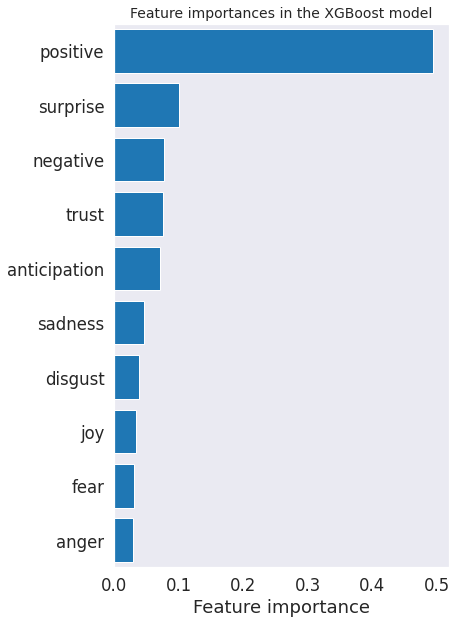

In [82]:
# Plotting feature importances
plt.figure(figsize=(6,10))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()